# Group 16

|Name|Student ID|
|-|-|
|Diogo Silva|20201643|
|Marisa Sequeira|20230989|
|Gonçalo Cardoso|20230588|

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import string
import re
#import gensim
#import gensim.downloader
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB

---------------
# Data Import

In [2]:
train_df = pd.read_excel("train.xlsx")
train_reviews_df = pd.read_excel("train_reviews.xlsx")

test_df = pd.read_excel("test.xlsx")
test_reviews_df = pd.read_excel("test_reviews.xlsx")

train_df.tail(10)

,index,description,host_about,unlisted
6238,6239,Add a touch of cosiness to your Lisbon vacatio...,"At Olala Homes, our love for travel and hospit...",1
6239,6240,Comfortable and cozy are the main words to des...,Founded by travel enthusiasts (just like you) ...,0
6240,6241,My Cozy Studio is very practical and especiall...,Hello!_x000D_\nI m Portuguese and i love to me...,1
6241,6242,This is an ideal apartment: bright and comfort...,"As Lisbon lovers, we enjoy the climate, landsc...",0
6242,6243,70 sqm apartment in a very good neighborhood o...,Lisboeta de gema. Adoro viajar. Já morei em Ro...,1
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
6247,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0


In [3]:
train_reviews_df.tail(10)

,index,comments
361271,6248,Ana's place is just what you need for a quick ...
361272,6248,"Espaço agradável, recomendo vivamente. É pequ..."
361273,6248,Le logement est fonctionnel la seule bémol un ...
361274,6248,Ras le logement est comme indiqué :)
361275,6248,Definetly good location. Apartment was cozy an...
361276,6248,The location was perfect. The apartment was ve...
361277,6248,Ana's place is exactly as described and even b...
361278,6248,A Ana foi muito atenciosa e preocupou se com o...
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...
361280,6248,"O espaço é ótimo, a D. Ana foi maravilhosa e f..."


In [4]:
# Set train_df's 'index' as index
train_df.set_index('index', inplace=True)

# Since train_reviews_df's index is not unique, we are not setting it as index 
# and instead changing it's name to be more descriptive
train_reviews_df.rename(columns={'index': 'airbnb_reference'}, inplace=True)
test_reviews_df.rename(columns={'index': 'airbnb_reference'}, inplace=True)


-----------------
# Explanatory Analysis

## Dependent feature (unlisted)

A property is considered unlisted (1) if 
it got removed from the quarterly Airbnb list and it is considered listed (0)

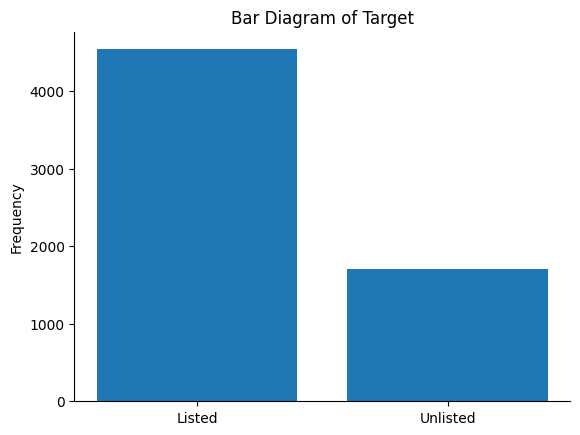

In [5]:
# Check dataset balance through target

plt.bar(train_df['unlisted'].value_counts().index, train_df['unlisted'].value_counts().values)
plt.title('Bar Diagram of Target')
plt.xticks([0, 1], ['Listed', 'Unlisted'])
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# print(train_df['unlisted'].value_counts())

# We can see the dataset isn't very balanced

In [6]:
# Check if there are nans in the target

train_df['unlisted'].unique()

array([0, 1], dtype=int64)

---------------
## Independent features

train_df -> 'description' and 'host_about'

train_reviews_df -> 'comments'

In [7]:
# Define laguange detection function
from langdetect import detect, detect_langs
from langcodes import Language
from tabulate import tabulate

def lang_detect(df,col):
  comments_column = df[col]
  # Store of the detected languages
  languages = set()
  # Check all comments
  for comment in comments_column:
      try:
          # Find out which language the "comments" have
          detect_lang = detect_langs(comment)[0].lang
          languages.add(detect_lang)
      except:
          pass

  # Detection of the total number of different languages
  num_languages = len(languages)

  language_counts = {}
  # Repeat after each column's comment
  for comment in comments_column:
      try:
          # Language detection in the comments
          detect_lang = detect_langs(comment)[0].lang
          # Count of the detected language
          if detect_lang in language_counts:
              language_counts[detect_lang] += 1
          else:
              language_counts[detect_lang] = 1
      except:
          pass

  # Total number of comments
  total_comments = len(comments_column)

  # List of the table's language data
  language_table_data = []
  for detect_lang, count in language_counts.items():
      percentage = round(count / total_comments * 100, 2)
      language_name = Language.get(detect_lang)
      language_table_data.append([language_name, count, percentage])

  # The language data should be sorted in descending order by proportion
  language_table_data.sort(key=lambda x: x[2], reverse=True)

  # Do the top 5 languages' cumulative percentage calculations
  cumulative_percentage = sum(row[2] for row in language_table_data[:5])

  # Define "Others" category
  others_count = sum(row[1] for row in language_table_data[5:])
  others_percentage = round((others_count / total_comments) * 100, 2)
  language_table_data = language_table_data[:5] + [["Others", others_count, others_percentage]]

  # Show the total number of languages found
  print("Number of different languages found:", num_languages)

  # Print the language data
  headers = ["Language", "Total Count", "Percentage"]
  table = tabulate(language_table_data, headers=headers)
  print(table)


**comment this since it takes a little to run**

In [8]:
lang_detect(train_df,'host_about')

Number of different languages found: 30
Language      Total Count    Percentage
----------  -------------  ------------
en                   4441         71.08
pt                   1272         20.36
fr                    139          2.22
es                     85          1.36
de                     55          0.88
Others                189          3.02


In [9]:
lang_detect(train_df,'description')

Number of different languages found: 12
Language      Total Count    Percentage
----------  -------------  ------------
en                   5105         81.71
pt                    911         14.58
fr                     84          1.34
da                     58          0.93
de                     45          0.72
Others                 45          0.72


In [10]:
lang_detect(train_reviews_df,'comments')

Number of different languages found: 43
Language      Total Count    Percentage
----------  -------------  ------------
en                 232349         64.31
fr                  53262         14.74
pt                  22434          6.21
es                  19250          5.33
de                  14216          3.93
Others              18850          5.22


- The top languages are saved in a list to later use in pre-processing

In [ ]:
langs =  {}
langs['pt'] = 'portuguese'
langs['en'] = 'english'
langs['fr'] = 'french'
langs['es'] = 'spanish'
langs['de'] = 'german'
langs['da'] = 'danish'

In [ ]:
independent_features = ['description', 'host_about', 'comments']

# Calculate word count for each independent text feature
train_df['description_wc'] = train_df['description'].apply(lambda x: len(str(x).split(" ")))
train_df['host_about_wc'] = train_df['host_about'].apply(lambda x: len(str(x).split(" ")))
train_reviews_df['comments_wc'] = train_reviews_df['comments'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
# View word count
for each in independent_features:
    df = None
    if each == 'comments':
        df = train_reviews_df
    else:
        df = train_df
    
    df[each + '_wc'].hist()
    plt.grid(False)  
    plt.title('Word Count for ' + each)
    plt.xlabel('Words p/ row')
    plt.ylabel('Frequency')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()


In [ ]:
# Get mean words per row
for each in independent_features:
    df = None
    if each == 'comments':
        df = train_reviews_df
    else:
        df = train_df
    print('Mean words per row for ' + each + ':', round(df[each + '_wc'].mean(), 2))

In [ ]:
# Remove columns as the analysis is done
train_df.drop('description_wc', axis=1, inplace=True)
train_df.drop('host_about_wc', axis=1, inplace=True)
train_reviews_df.drop('comments_wc', axis=1, inplace=True)

**Conclusion**
- Description is the feature with most words per row by far
- Comments has least amount per row

In [ ]:
# Get word distribution

all_words_description = ' '.join(train_df['description']).split()
all_words_host_about = ' '.join(train_df['host_about']).split()
all_words_comments = ' '.join(train_reviews_df['comments']).split()

freq_description = pd.Series(all_words_description).value_counts()
freq_host_about = pd.Series(all_words_host_about).value_counts()
freq_comments = pd.Series(all_words_comments).value_counts()

freq_list = [freq_description, freq_host_about, freq_comments]

In [ ]:
# View word distribution

for each in freq_list:
    x_labels = each.index[0:15]
    values = each[:15]
    plt.bar(x_labels, values)
    plt.xticks(x_labels, rotation=45)
    plt.ylabel('Frequency')
    plt.title('Most Frequent Words')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

**Conclusion** 
- 'and' and 'the' seem to be the most frequent ones as one could expect
- some words with special characters seem to be quite common and should maybe be removed for example the '/><br' in description

In [ ]:
# Check missing values

for each in independent_features:
    if each == 'comments':
        print(f'{each} has {train_reviews_df[each].isnull().sum()} missing values')
    else:
        print(f'{each} has {train_df[each].isnull().sum()} missing values')

------------
# Pre Processing

## Translate

train_df['description'] = translate_col(train_df['description'])
train_df['host_about'] = translate_col(train_df['host_about'])
train_reviews_df['comments'] = translate_col(train_reviews_df['comments'])
test_df['description'] = translate_col(test_df['description'])
test_df['host_about'] = translate_col(test_df['host_about'])
test_reviews_df['comments'] = translate_col(test_reviews_df['comments'])

train_df.to_excel('translated/train.xlsx')
train_reviews_df.to_excel('translated/train_reviews.xlsx')
test_df.to_excel('translated/test.xlsx')
test_reviews_df.to_excel('translated/test_reviews.xlsx')

## Lowercase

In [ ]:
def transform_row_lowerc(text):
    if isinstance(text, str):
        text = text.lower()
    else:
        text = ""
    return text

In [ ]:
def lower_case(df):
    for each in df.columns:
        if each in independent_features:
            print(f"Applying lowecase in column {each} ...")
            df[each] = df.apply( lambda row: transform_row_lowerc(row[each]), axis=1)
    return df

In [ ]:
train_df = lower_case(train_df)
train_reviews_df = lower_case(train_reviews_df)
test_df = lower_case(test_df)
test_reviews_df = lower_case(test_reviews_df)

## Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
# nltk.download('all', quiet=True)
# nltk.download('rslp', quiet=True)
# nltk.download('stopwords', quiet=True)

In [ ]:
stopwords_words = {}

for key in langs.keys():
    stopwords_words[key] = stopwords.words(langs[key])

In [ ]:
def transform_row_stpwrds(text):
    if isinstance(text, str):
        try:
            detected_lang = detect_langs(text)[0].lang
            if detected_lang in langs.keys():
                text = " ".join([word for word in text.split() if word not in stopwords_words[detected_lang]])
        except:
            pass
    return text

In [ ]:
def remove_stopwords(df):
    for each in df.columns:
        if each in independent_features:
            print(f"Removing stopwords from column {each} ...")
            df[each] = df.apply( lambda row: transform_row_stpwrds(row[each]), axis=1)
    return df

In [ ]:
#train_df = remove_stopwords(train_df)
#train_reviews_df = remove_stopwords(train_reviews_df)
#test_df = remove_stopwords(test_df) 
#test_reviews_df = remove_stopwords(test_reviews_df)

In [ ]:
#Save to excel since it took a bit of time

#train_df.to_excel('no_stopwords/stpwrds_train.xlsx')
#train_reviews_df.to_excel('no_stopwords/stpwrds_train_reviews.xlsx')
#test_df.to_excel('no_stopwords/stpwrds_test.xlsx')
#test_reviews_df.to_excel('no_stopwords/stpwrds_test_reviews.xlsx')

In [ ]:
# Import data to be updated up to this point (making sure)

train_df = pd.read_excel("no_stopwords/stpwrds_train.xlsx")
train_reviews_df = pd.read_excel("no_stopwords/stpwrds_train_reviews.xlsx")
test_df = pd.read_excel("no_stopwords/stpwrds_test.xlsx")
test_reviews_df = pd.read_excel("no_stopwords/stpwrds_test_reviews.xlsx")

## RegEx
- can still observe html marks, for this porpuse we'll use RegEx

In [ ]:
def apply_regex(text):
    # Example code from: https://medium.com/mlearning-ai/3-ways-to-clean-your-html-text-for-nlp-text-pre-processing-70bc5b876445

    try:
        if isinstance(text, str):
            text = re.sub(r'<[^>]+>'," ", text )
            text = re.sub(r'[^a-zA-Zç]'," ", text )
            while "  " in text:
                text = re.sub("  "," ", text )

            text = text.strip()
        else:
            text = str(text)
    except:
        text = ""

    return text

In [ ]:
def remove_html(df):
    for each in df.columns:
        if each in independent_features:
            print(f"Removing html from column {each} ...")
            df[each] = df.apply( lambda row: apply_regex(row[each]), axis=1)
    return df

In [ ]:
train_df = remove_html(train_df)
train_reviews_df = remove_html(train_reviews_df)
test_df = remove_html(test_df)
test_reviews_df = remove_html(test_reviews_df)
train_df.head(5)

## Merge reviews 

In [ ]:
# Drop all empty comments
train_reviews_df = train_reviews_df[train_reviews_df['comments'] != '']
test_reviews_df = test_reviews_df[test_reviews_df['comments'] != '']

In [ ]:
def merge_reviews(df_base, df_reviews):

    # Create a series with all comments concatenated by index
    grouped_comments_df = df_reviews.groupby(df_reviews['airbnb_reference'])['comments'].apply( lambda x: " ".join(x) )

    # Count comments by index
    nr_comments_df = df_reviews.groupby(df_reviews['airbnb_reference'])['comments'].count().rename('nr_comments')

    # Merge
    df_base = df_base.merge(grouped_comments_df, how="left", left_on="index", right_on="airbnb_reference")
    df_base = df_base.merge(nr_comments_df, how="left", left_on="index", right_on="airbnb_reference")

    df_base['comments'].fillna('', inplace=True)
    df_base['nr_comments'].fillna(0, inplace=True)

    df_base.set_index('index', inplace=True)

    return df_base

In [ ]:
train_pp_df = merge_reviews( train_df, train_reviews_df)
test_pp_df  = merge_reviews( test_df,  test_reviews_df)

## Save Pre-processed data

- Ideally we would translate everything to english but we tried and was taking too much time, since the project delivery time was near, we chose to not do it, and then maybe try it after if we had extra time

In [ ]:
#train_pp_df.to_excel('pre-processed/train_pp.xlsx')
#test_pp_df.to_excel('pre-processed/test_pp.xlsx')

------------
# Feature Engineering


In [2]:
independent_features = ['description', 'host_about', 'comments']

## Split DF's

In [3]:
train_df = pd.read_excel("pre-processed/train_pp.xlsx")
test_df = pd.read_excel("pre-processed/test_pp.xlsx")

In [4]:
# Saved with index true, so we need to drop it
train_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

In [5]:
# Split train to get val (30%) and the target column 'unlisted' as y
X_train, X_val, y_train, y_val = train_test_split(train_df, train_df['unlisted'], test_size = 0.3, random_state = 0)

X_test = test_df

# Remove target (y) from X
X_train.drop('unlisted', axis=1, inplace=True)
X_val.drop('unlisted', axis=1, inplace=True)

In [6]:
X_train.head(5)

,description,host_about,comments,nr_comments
2060,ideal pessoas pode acomoda pessoas apartamento...,paix o tango,place exactly described photos great value mon...,145
2214,boasting stylish finish unbeatable location be...,name anita i m originally melbourne however li...,NaN,0
1293,welcome wonderful apartment clean comfortable ...,im surfer traveller see faces surf oceans x d ...,wife lucky enough first ones stay loved it dan...,272
2142,covid aware please read below this beautiful b...,hi alexandra pedro brother sister x d x d grea...,lovely stay apartment cristina very nice air b...,15
3639,beautiful brand new apartment located lisbon h...,second house short term rental management comp...,thank hosting time lisbon partner much enjoyed...,108


## TF-IDF 

- We tought it was best to use tf-idf which highlights words that are more important to the context rather than those that appear frequently

In [7]:
X_train_fit = X_train.copy()

In [8]:
'''def apply_tfidf(df):
    for col in independent_features:
      try:
         print(col)
         tfidf = TfidfVectorizer()
         tfidf.fit(df[col])
         X = tfidf.transform(df[col])
         return X
      except:
          pass'''
    

'def apply_tfidf(df):\n    for col in independent_features:\n      try:\n         print(col)\n         tfidf = TfidfVectorizer()\n         tfidf.fit(df[col])\n         X = tfidf.transform(df[col])\n         return X\n      except:\n          pass'

In [9]:
tfidf = TfidfVectorizer()
X_train_fit['text_combined'] = X_train_fit['description'] + ' ' + X_train_fit['host_about'] + ' ' + X_train_fit['comments']
tfidf.fit(X_train_fit['text_combined'].fillna('')) 

def apply_tfidf(df):
    df['text_combined'] = df['description'] + ' ' + df['host_about'] + ' ' + df['comments']
    try:
        print(f"Applying TF-IDF...")
        X = tfidf.transform(df['text_combined'].fillna(''))
        return X.toarray()
    except Exception as e:
        print(f"Failed to process, error: {e}")
        return None

In [10]:
#Apply TF-IDF

#For Train
#print('For Train:')
#X_train_tfidf = apply_tfidf(X_train, is_train=True)
#y_train_tfidf = np.array(y_train)

#For Val
#print('For Val:')
#X_val_tfidf = apply_tfidf(X_val)
#y_val_tfidf = np.array(y_val)

#For Test
#print('For Test:')
#X_test_tfidf = apply_tfidf(X_test)

For Train:
Applying TF-IDF...
For Val:
Applying TF-IDF...
For Test:
Applying TF-IDF...


In [11]:
# Save data in csv
#np.savetxt('feature_eng/tf_idf/X_train_tfidf.csv', X_train_tfidf, delimiter=',')
#np.savetxt('feature_eng/tf_idf/y_train_tfidf.csv', y_train_tfidf, delimiter=',')
#np.savetxt('feature_eng/tf_idf/X_val_tfidf.csv', X_val_tfidf, delimiter=',')
#np.savetxt('feature_eng/tf_idf/y_val_tfidf.csv', y_val_tfidf, delimiter=',')
#np.savetxt('feature_eng/tf_idf/X_test_tfidf.csv', X_test_tfidf, delimiter=',')

## Word Embeddings

In [2]:
#import gensim.downloader
import tensorflow as tf
#from tqdm.notebook import tqdm

In [87]:
#300 indicates the embedding size
#w2v = gensim.downloader.load('word2vec-google-news-300')
emb_size = 300 

In [14]:
def combine_text(df, columns):
    combined_text = df[columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    return combined_text

In [15]:
#function to get embeddings for each word based on w2v list
def corpus2vec(corpus):
    corpus_vec = []
    for document in tqdm(corpus):
        doc_vectors = []
        for word in document.split():
            if word in w2v.index_to_key:
                doc_vectors.append(w2v.get_vector(word))         
        corpus_vec.append(doc_vectors)
    return corpus_vec

In [16]:
def sentence_embedding(corpus_vec):
    sentence_embeddings = []
    for doc in corpus_vec:
        if doc:  
            sentence_embeddings.append(np.mean(doc, axis=0))
        else:  
            sentence_embeddings.append(np.zeros(w2v.vector_size))
    return np.array(sentence_embeddings)

In [17]:
def apply_we(df):
    print("Applying word embeddings ...")
    corpus = combine_text(df, independent_features)
    corpus_vec = corpus2vec(corpus)
    return sentence_embedding(corpus_vec)

In [18]:
#Apply Embeddings

#For Train
#X_train_we = apply_we(X_train)
#y_train_we = np.array(y_train)

#For Val
#X_val_we = apply_we(X_val)
#y_val_we = np.array(y_val)

#For Test
#X_test_we = apply_we(X_test)

In [19]:
# Took around 30 hours, so save in csv

#np.savetxt('feature_eng/word_embeddings/X_train_we.csv', X_train_we, delimiter=',')
#np.savetxt('feature_eng/word_embeddings/y_train_we.csv', y_train_we, delimiter=',')
#np.savetxt('feature_eng/word_embeddings/X_val_we.csv', X_val_we, delimiter=',')
#np.savetxt('feature_eng/word_embeddings/y_val_we.csv', y_val_we, delimiter=',')
#np.savetxt('feature_eng/word_embeddings/X_test_we.csv', X_test_we, delimiter=',')

## Pad Sequencing (for LSTM)

In [55]:
'''def apply_ps(df_vec):
    sen_len = []
    for i in df_vec:
        sen_len.append(len(i))
    df_padded = pad_sequences(maxlen=max(sen_len),sequences=df_vec, padding="post", dtype='float64')
    return tf.convert_to_tensor(df_padded, dtype='float32'), sen_len'''

# Modeling & Evaluation

Main
- KNN 
- Logistic Regression 
- MLP 

Extra
- Naive Bayes
- Gradient Boost



**Possiveis Upgrades**
- Fazer gridsearch nos aplicaveis (Logistic Reg.)
- Rerun word embeds mudar combine_text function

In [59]:
# Import feature_eng data
# Train
X_train_tfidf = np.loadtxt('feature_eng/tf_idf/X_train_tfidf.csv', delimiter=',')
y_train_tfidf = np.loadtxt('feature_eng/tf_idf/y_train_tfidf.csv', delimiter=',')
X_train_we = np.loadtxt('feature_eng/word_embeddings/X_train_we.csv', delimiter=',')
y_train_we = np.loadtxt('feature_eng/word_embeddings/y_train_we.csv', delimiter=',')

# Val
X_val_tfidf = np.loadtxt('feature_eng/tf_idf/X_val_tfidf.csv', delimiter=',')
y_val_tfidf = np.loadtxt('feature_eng/tf_idf/y_val_tfidf.csv', delimiter=',')
X_val_we = np.loadtxt('feature_eng/word_embeddings/X_val_we.csv', delimiter=',')
y_val_we = np.loadtxt('feature_eng/word_embeddings/y_val_we.csv', delimiter=',')

# Test
X_test_tfidf = np.loadtxt('feature_eng/tf_idf/X_test_tfidf.csv', delimiter=',')
X_test_we = np.loadtxt('feature_eng/word_embeddings/X_test_we.csv', delimiter=',')

"# Import feature_eng data\n# Train\nX_train_tfidf = np.loadtxt('feature_eng/tf_idf/X_train_tfidf.csv', delimiter=',')\ny_train_tfidf = np.loadtxt('feature_eng/tf_idf/y_train_tfidf.csv', delimiter=',')\nX_train_we = np.loadtxt('feature_eng/word_embeddings/X_train_we.csv', delimiter=',')\ny_train_we = np.loadtxt('feature_eng/word_embeddings/y_train_we.csv', delimiter=',')\n\n# Val\nX_val_tfidf = np.loadtxt('feature_eng/tf_idf/X_val_tfidf.csv', delimiter=',')\ny_val_tfidf = np.loadtxt('feature_eng/tf_idf/y_val_tfidf.csv', delimiter=',')\nX_val_we = np.loadtxt('feature_eng/word_embeddings/X_val_we.csv', delimiter=',')\ny_val_we = np.loadtxt('feature_eng/word_embeddings/y_val_we.csv', delimiter=',')\n\n# Test\nX_test_tfidf = np.loadtxt('feature_eng/tf_idf/X_test_tfidf.csv', delimiter=',')\nX_test_we = np.loadtxt('feature_eng/word_embeddings/X_test_we.csv', delimiter=',')"

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [61]:
def display_results(true, pred):
  # display metrics
  print(f'Accuracy: {round(accuracy_score(true, pred),2)}')
  print(f'Precision: {round(precision_score(true, pred),2)}')
  print(f'Recall: {round(recall_score(true, pred),2)}')
  f1 = round(f1_score(true, pred, average='weighted'),2)
  print(f'F1 Score: {f1}')
  print(' ')
  print(' ')
  # plot confusion matrix
  conf_matrix = confusion_matrix(true, pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['listed', 'unlisted'])
  cm_display.plot(cmap = "OrRd")
  plt.show()

## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
modelknn = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine', weights = 'distance', n_jobs=-1)

### KNN with TF-IDF

Accuracy: 0.9
Precision: 0.72
Recall: 1.0
F1 Score: 0.9
 
 


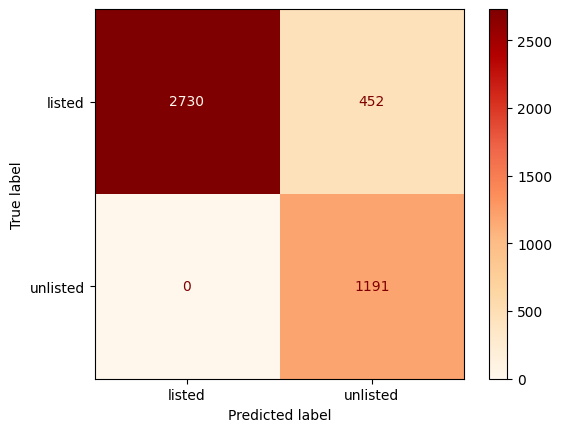

In [64]:
modelknn.fit(X=X_train_tfidf, y=y_train_tfidf)
y_pred = modelknn.predict(X_train_tfidf)
display_results(y_train_tfidf, y_pred)

Accuracy: 0.87
Precision: 0.71
Recall: 0.86
F1 Score: 0.87
 
 


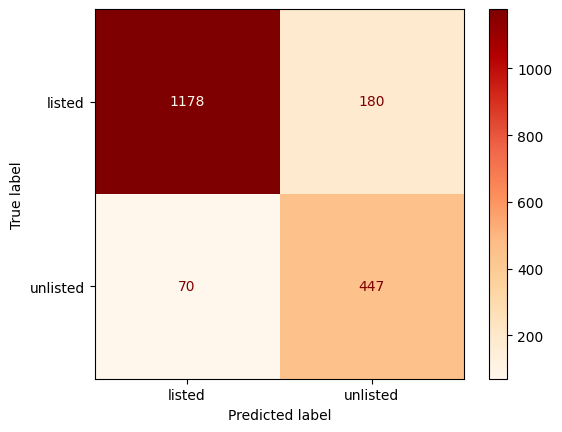

In [65]:
y_pred = modelknn.predict(X_val_tfidf)
display_results(y_val_tfidf, y_pred)

### KNN with Word Embedings

In [66]:
modelknn.fit(X=X_train_we, y=y_train_we)

KNeighborsClassifier(metric='cosine', n_jobs=-1, weights='distance')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
 
 


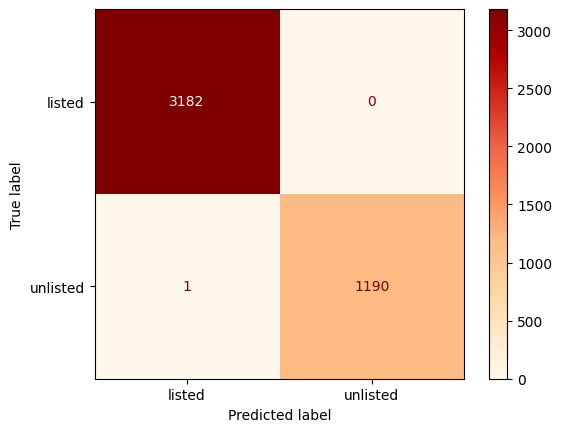

In [67]:
y_pred = modelknn.predict(X_train_we)
display_results(y_train_we, y_pred)

Accuracy: 0.84
Precision: 0.83
Recall: 0.53
F1 Score: 0.83
 
 


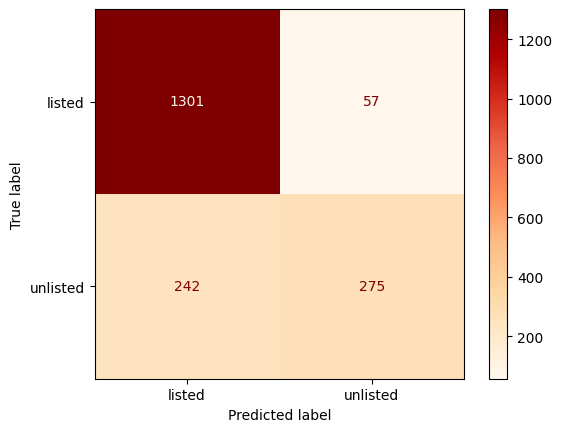

In [68]:
y_pred = modelknn.predict(X_val_we)
display_results(y_val_we, y_pred)

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(random_state=0, n_jobs=-1)

### LR with TF-IDF

In [71]:
lr.fit(X=X_train_tfidf, y=y_train_tfidf)

LogisticRegression(n_jobs=-1, random_state=0)

Accuracy: 0.85
Precision: 0.69
Recall: 0.85
F1 Score: 0.86
 
 


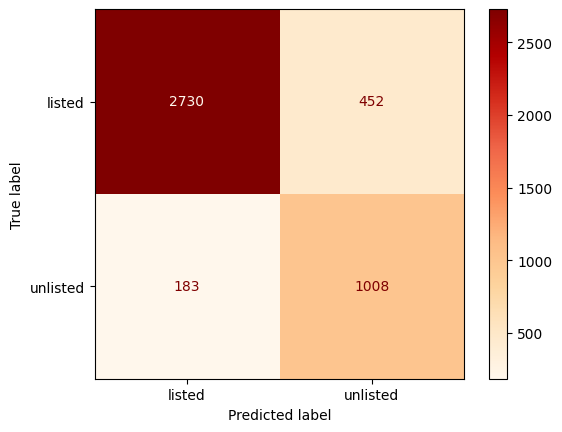

In [72]:
y_pred = lr.predict(X_train_tfidf)
display_results(y_train_tfidf, y_pred)

Accuracy: 0.87
Precision: 0.72
Recall: 0.85
F1 Score: 0.87
 
 


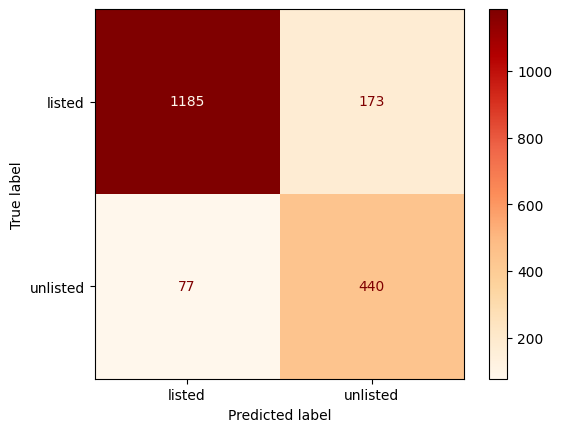

In [73]:
y_pred = lr.predict(X_val_tfidf)
display_results(y_val_tfidf, y_pred)

### LR with Word Embeddings

In [74]:
lr.fit(X=X_train_we, y=y_train_we)

LogisticRegression(n_jobs=-1, random_state=0)

Accuracy: 0.84
Precision: 0.74
Recall: 0.64
F1 Score: 0.84
 
 


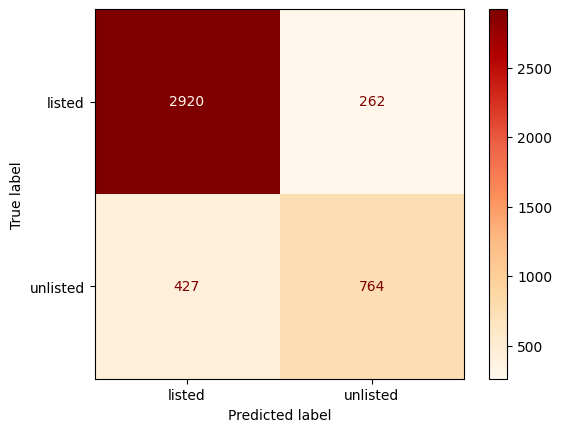

In [75]:
y_pred = lr.predict(X_train_we)
display_results(y_train_we, y_pred)

Accuracy: 0.84
Precision: 0.75
Recall: 0.6
F1 Score: 0.83
 
 


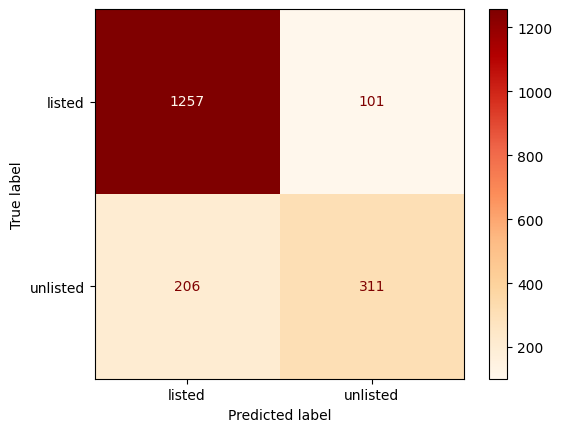

In [76]:
y_pred = lr.predict(X_val_we)
display_results(y_val_we, y_pred)

## Multi Layer Perceptron

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)

### MLP with TF-IDF

In [79]:
mlp.fit(X=X_train_tfidf, y=y_train_tfidf)

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), random_state=1)

Accuracy: 0.9
Precision: 0.72
Recall: 1.0
F1 Score: 0.9
 
 


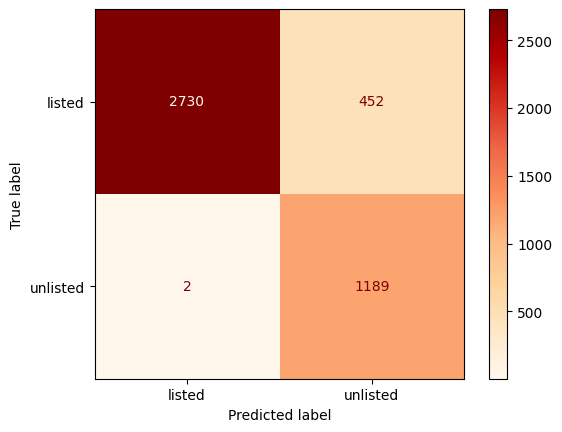

In [80]:
y_pred = mlp.predict(X_train_tfidf)
display_results(y_train_tfidf, y_pred)

Accuracy: 0.87
Precision: 0.71
Recall: 0.86
F1 Score: 0.87
 
 


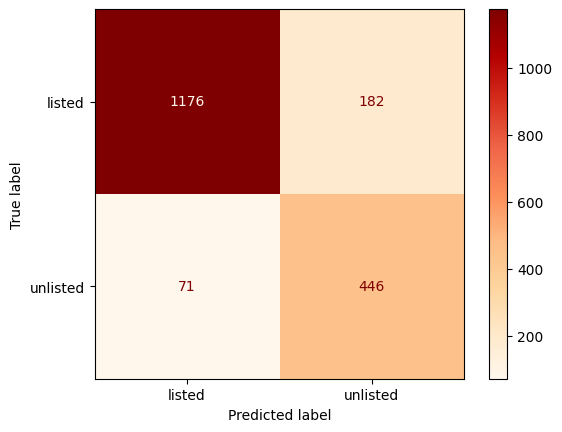

In [81]:
y_pred = mlp.predict(X_val_tfidf)
display_results(y_val_tfidf, y_pred)

### MLP with Word Embeddings

In [82]:
mlp.fit(X=X_train_we, y=y_train_we)

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), random_state=1)

Accuracy: 0.85
Precision: 0.71
Recall: 0.76
F1 Score: 0.85
 
 


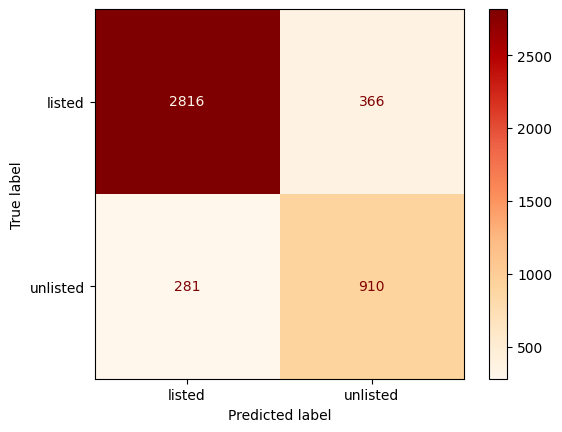

In [83]:
y_pred = mlp.predict(X_train_we)
display_results(y_train_we, y_pred)

Accuracy: 0.85
Precision: 0.72
Recall: 0.72
F1 Score: 0.85
 
 


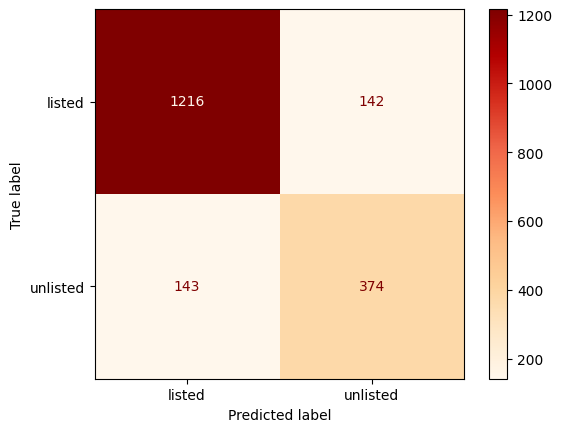

In [84]:
y_pred = mlp.predict(X_val_we)
display_results(y_val_we, y_pred)

## Naive Bayes

In [91]:
nb = GaussianNB()

### NB with TF-IDF

In [92]:
nb.fit(X_train_tfidf, y_train_tfidf)

GaussianNB()

Accuracy: 0.9
Precision: 0.72
Recall: 1.0
F1 Score: 0.9
 
 


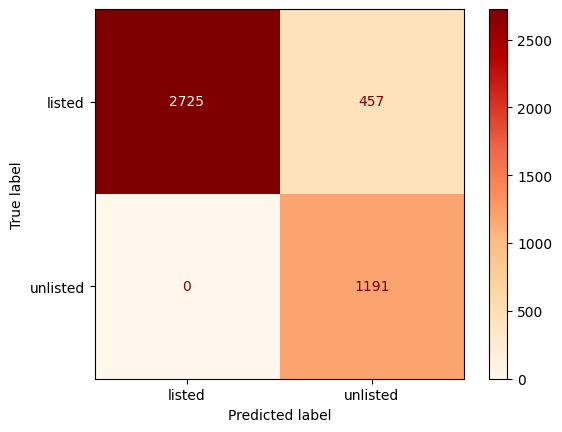

In [93]:
y_pred = nb.predict(X_train_tfidf)
display_results(y_train_tfidf, y_pred)

Accuracy: 0.86
Precision: 0.7
Recall: 0.85
F1 Score: 0.86
 
 


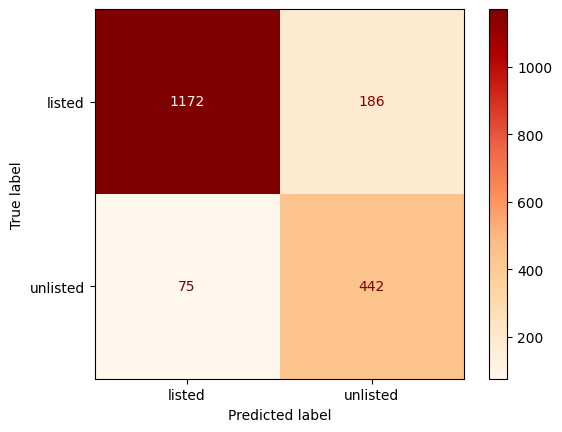

In [94]:
y_pred = nb.predict(X_val_tfidf)
display_results(y_val_tfidf, y_pred)

### NB with Word Embeddings

In [95]:
nb.fit(X_train_we, y_train_we)

GaussianNB()

Accuracy: 0.81
Precision: 0.62
Recall: 0.79
F1 Score: 0.82
 
 


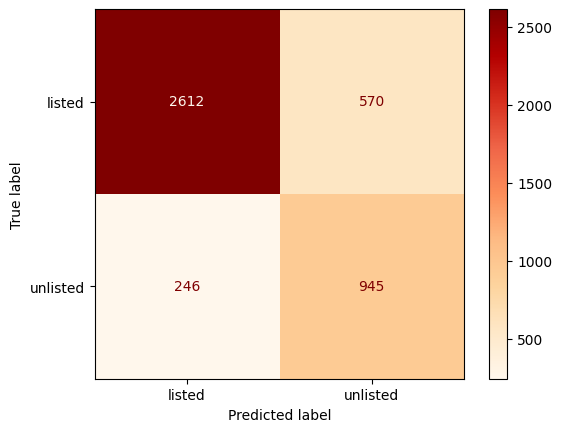

In [96]:
y_pred = nb.predict(X_train_we)
display_results(y_train_we, y_pred)

Accuracy: 0.83
Precision: 0.65
Recall: 0.8
F1 Score: 0.83
 
 


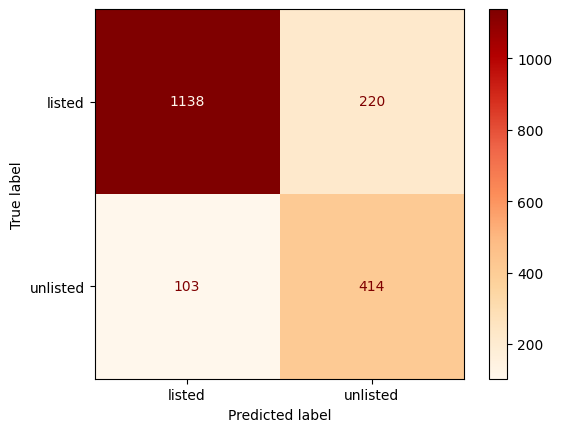

In [97]:
y_pred = nb.predict(X_val_we)
display_results(y_val_we, y_pred)

## Gradient Boost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gb = GradientBoostingClassifier(learning_rate=0.1)

### GB with TF-IDF

In [100]:
gb.fit(X_train_tfidf, y_train_tfidf)

GradientBoostingClassifier()

Accuracy: 0.87
Precision: 0.7
Recall: 0.88
F1 Score: 0.87
 
 


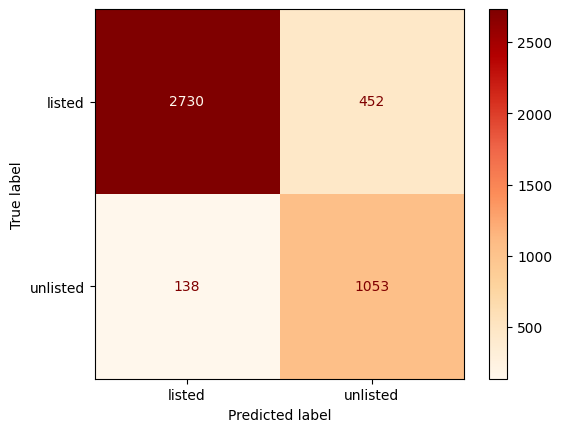

In [101]:
y_pred = gb.predict(X_train_tfidf)
display_results(y_train_tfidf, y_pred)

Accuracy: 0.87
Precision: 0.72
Recall: 0.86
F1 Score: 0.87
 
 


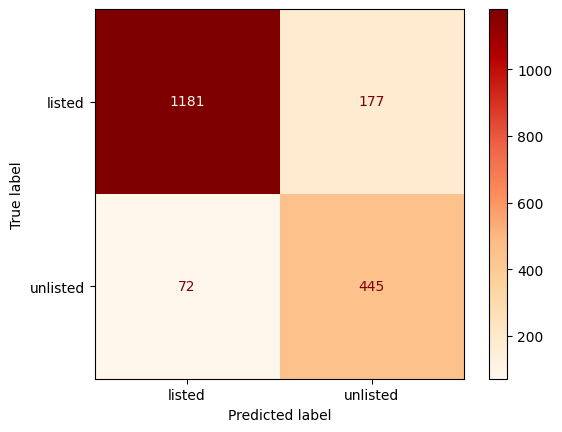

In [102]:
y_pred = gb.predict(X_val_tfidf)
display_results(y_val_tfidf, y_pred)

### GB with Word Embeddings

In [103]:
gb.fit(X_train_we, y_train_we)

GradientBoostingClassifier()

Accuracy: 0.94
Precision: 0.92
Recall: 0.84
F1 Score: 0.93
 
 


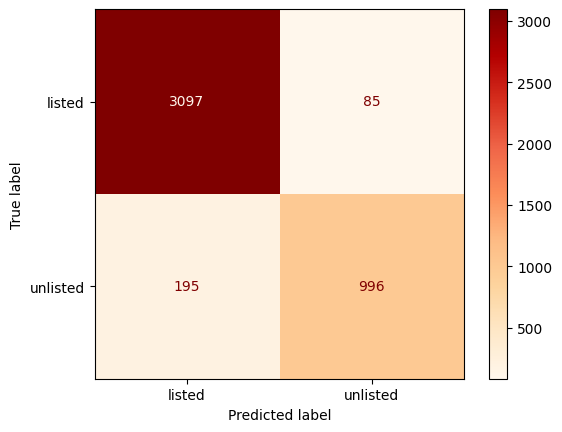

In [104]:
y_pred = gb.predict(X_train_we)
display_results(y_train_we, y_pred)

Accuracy: 0.86
Precision: 0.76
Recall: 0.74
F1 Score: 0.86
 
 


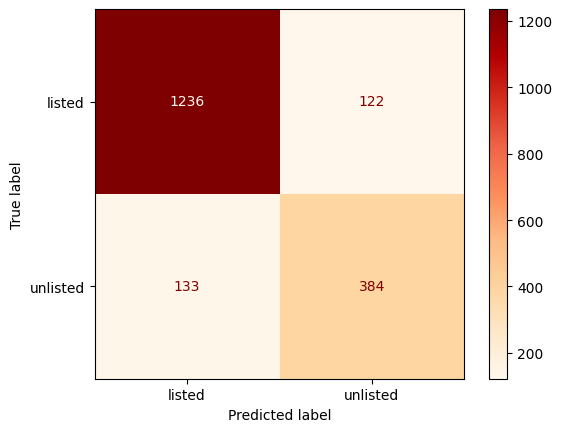

In [105]:
y_pred = gb.predict(X_val_we)
display_results(y_val_we, y_pred)

## Long Short Term Memory (LSTM)
- TENTAMOS IMPLEMENTAR LSTM MAS DECIDIMOS NAO UTILIZAR

## Conclusions

- TF-IDF consistently provides higher recall and F1 scores across all models compared to word embeddings. Since the target is unbalanced, recall and F1 scores are critical because they provide a better balance between precision and recall, ensuring that the model is not biased towards the majority class.
- The Gradient Boosting model shows slightly better and consistent results with both TF-IDF and word embeddings, making it a robust choice.

# Predict

In [113]:
gb_final = GradientBoostingClassifier(learning_rate=0.1)

In [114]:
gb_final.fit(X_train_tfidf, y_train_tfidf)

GradientBoostingClassifier()

In [115]:
prediction_labels = gb_final.predict(X_test_tfidf)
prediction_labels

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [117]:
X_test['predicted'] = prediction_labels
deliverable_df = X_test[['index', 'predicted']]

In [119]:
deliverable_df.to_csv('predictions/Predictions_16.csv', index=False)